# Занятие 3: Визуализация данных с Matplotlib и Seaborn

Сегодня научимся видеть данные глазами 
Мы построим первые графики, разберем их типы и визуализируем **настоящий набор данных Titanic**.

## 1. Повторим Pandas: работа с CSV

In [1]:
import pandas as pd

# Загружаем Titanic с Kaggle через прямую ссылку или локально
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Проверим размер и общую информацию
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Основная статистика
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# Проверим, сколько пропущенных значений
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Знакомство с Matplotlib

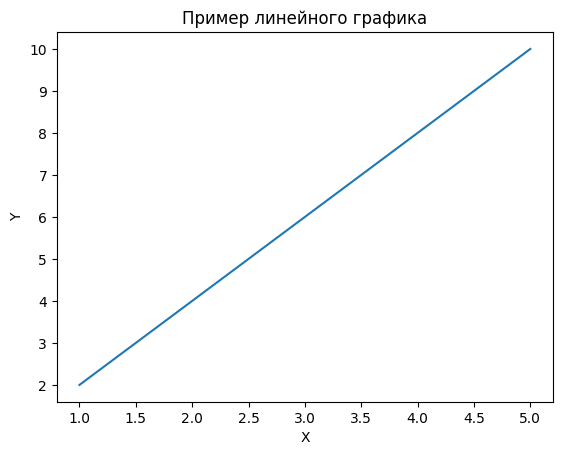

In [5]:
import matplotlib.pyplot as plt

# Простейший график
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.title("Пример линейного графика")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Столбчатая диаграмма

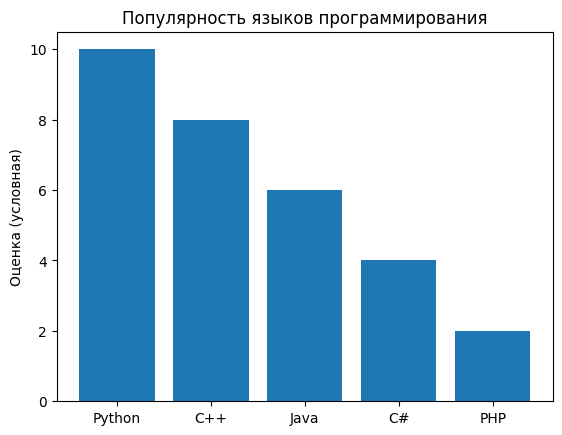

In [6]:
objects = ['Python', 'C++', 'Java', 'C#', 'PHP']
performance = [10, 8, 6, 4, 2]

plt.bar(objects, performance)
plt.title("Популярность языков программирования")
plt.ylabel("Оценка (условная)")
plt.show()

### Диаграмма выживаемости (Titanic)

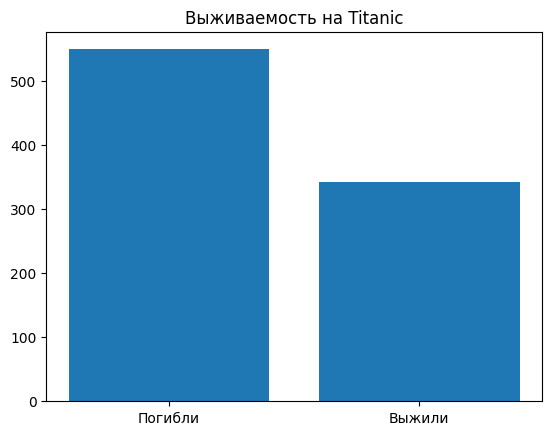

In [7]:
survived_counts = df['Survived'].value_counts()
plt.bar(['Погибли', 'Выжили'], survived_counts)
plt.title("Выживаемость на Titanic")
plt.show()

### Распределение возраста

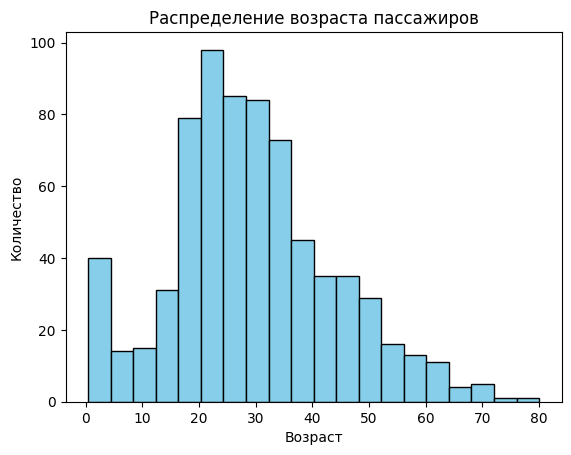

In [8]:
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

## 3. Seaborn — красивая визуализация

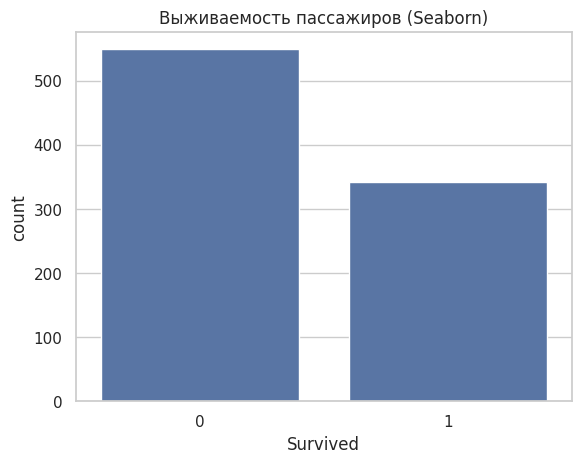

In [9]:
import seaborn as sns

# Стиль графиков
sns.set(style="whitegrid")

# Диаграмма выживаемости
sns.countplot(x='Survived', data=df)
plt.title("Выживаемость пассажиров (Seaborn)")
plt.show()

### Распределение возраста по полу

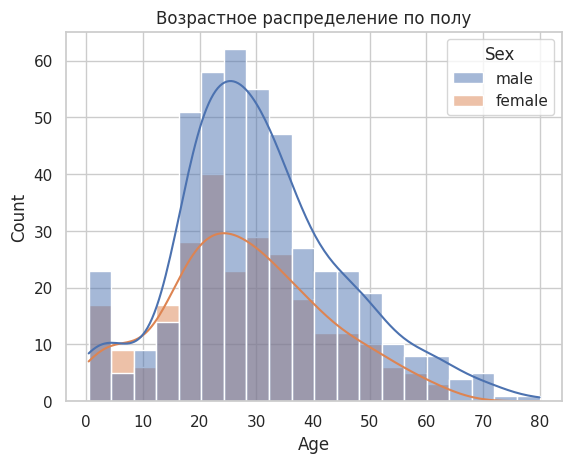

In [10]:
sns.histplot(data=df, x='Age', hue='Sex', kde=True)
plt.title("Возрастное распределение по полу")
plt.show()

### Boxplot — распределение стоимости билетов по классам

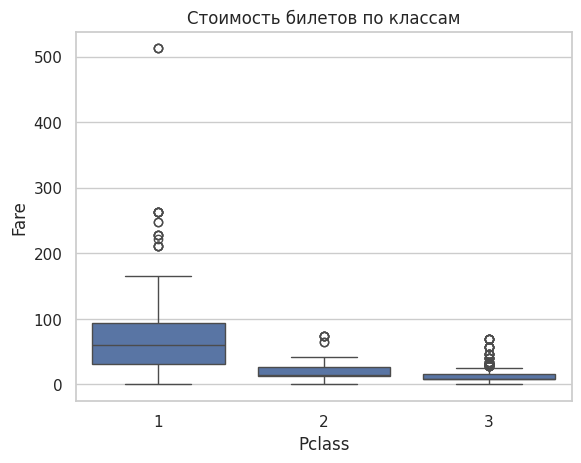

In [11]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title("Стоимость билетов по классам")
plt.show()

### Pairplot — взаимосвязи между признаками

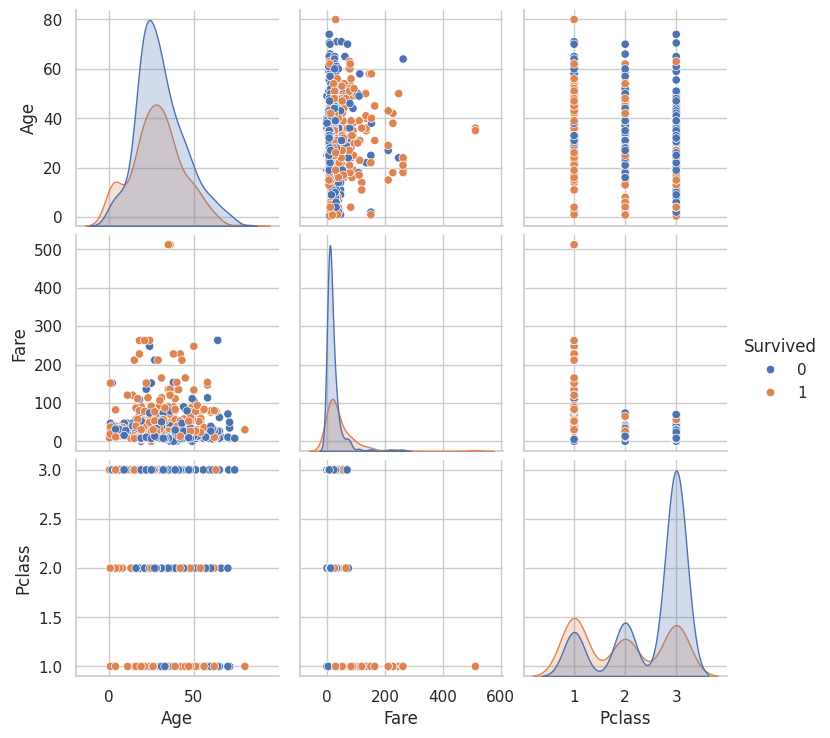

In [12]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

# Домашнее задание

## Задание 1. Анализ Titanic

**Цель:** исследовать набор данных и визуализировать базовые зависимости.

1. Загрузите датасет Titanic (через ссылку или `seaborn.load_dataset('titanic')`).
2. Постройте **3 разных типа графиков** (на выбор: `barplot`, `histplot`, `boxplot`, `countplot`, `scatterplot`).
3. Каждый график должен отвечать на конкретный вопрос, например:
   - Сколько мужчин и женщин было на борту?  
   - Как распределяется возраст по классам?  
   - Есть ли связь между стоимостью билета и выживаемостью?

*Подсказка:* используйте подписи осей, заголовки (`plt.title`) и добавьте короткие выводы в текстовой ячейке Markdown.

## Задание 2. Сравнение библиотек Matplotlib и Seaborn

**Цель:** понять, как отличаются подходы двух библиотек.

1. Постройте **один и тот же график** (например, распределение возраста пассажиров)  
   сначала с помощью `matplotlib`, затем с помощью `seaborn`.
2. Сравните код — что проще? где понятнее результат?  
3. Добавьте короткий комментарий с вашим мнением.

## Задание 3. Мини-проект: «Что влияет на выживаемость?»

**Цель:** применить визуализацию для анализа зависимостей.

1. Проанализируйте, какие признаки могли повлиять на выживаемость (`Survived`):

- Пол (`Sex`)
- Класс (`Pclass`)
- Возраст (`Age`)
- Стоимость билета (`Fare`)

2. Постройте минимум **2 графика**, которые помогут сделать вывод.

3. Сформулируйте **короткий вывод (2–3 предложения)** в текстовой ячейке:

- Кто имел больше шансов выжить?
- Есть ли заметные различия между группами?

*Подсказка:* можно использовать sns.barplot, sns.violinplot или sns.boxplot.

## Что сдавать:

- Один .ipynb файл с выполненными заданиями.
- Все графики должны отображаться.
- Внизу файла — ваши выводы в Markdown.

*Совет:* не пытайтесь просто “нарисовать график”. Старайтесь понять, что рассказывают вам данные — это и есть суть Data Science 😉